<a href="https://colab.research.google.com/github/sandhya116/EDA/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Accidents at work in Italy

In [ ]:
pip install opendatasets --upgrade --quiet

In [10]:
import opendatasets as od

download_url = 'https://www.kaggle.com/serquet/accidents-at-work-in-italy'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sandhyayadavunbr
Your Kaggle Key: ··········


100%|██████████| 188M/188M [00:04<00:00, 42.5MB/s]


Start Data cleansing

Load the file using Pandas,
Look at some information about the data & the columns,
Fix any missing or incorrect values





In [ ]:
data_filename = './accidents-at-work-in-italy/inail_inail.csv'

In [ ]:
import pandas as pd

In [11]:
df = pd.read_csv(data_filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df

,DetectionDate,ProtocolDate,DateOfEvent,DefinitionDate,DeathDate,PlaceOfOccurrence,AaccidentIdentification,Gender,Age,PlaceOfBirth,ModesOfOccurrence,WithOrWithoutTransport,CaseID,AdministrativeDefinition,AdministrativeDefinitionFatalOutcome,Compensation,InstructionalDecisionFatalOutcome,DegreeOfImpairment,DegreeCompensated,EmployerIdentification,TerritorialInsurancePosition,EconomicActivitySector,Management,TariffManagement,LargeTariffGroup
0,30/04/2021,25/06/2018,22/06/2018,15/08/2018,NaN,20,13989297,F,54,ITAL,N,N,21587784,P,ND,TE,ND,-1,15,4120339,7478870,Q 87,I,3,0
1,30/04/2021,14/06/2019,12/06/2019,04/07/2019,NaN,27,8214943,F,61,ITAL,N,N,22385662,P,ND,TE,ND,-1,15,4771081,1982508,Q 87,I,3,0
2,30/04/2021,15/04/2020,01/04/2020,05/05/2020,NaN,27,24675768,F,49,ITAL,N,N,22923003,P,ND,TE,ND,-1,15,3490613,10687622,Q 87,I,3,0
3,30/04/2021,23/12/2020,20/12/2020,19/01/2021,NaN,22,12711994,F,47,Z127,N,N,23351299,P,ND,TE,ND,-1,15,5774459,3965254,Q 87,I,4,0
4,30/04/2021,30/10/2017,26/10/2017,21/11/2017,NaN,84,4770289,M,40,ITAL,N,N,21012366,P,ND,TE,ND,-1,15,6776721,8372342,Q 87,I,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299155,30/04/2021,23/10/2018,22/10/2018,07/11/2018,NaN,27,8632729,F,33,ITAL,N,N,21827852,P,ND,TE,ND,-1,15,4669083,5392212,Q 86,I,4,0
6299156,30/04/2021,24/10/2016,23/10/2016,12/04/2017,NaN,78,5265653,M,52,ITAL,N,N,20234719,P,ND,TE,ND,-1,15,7854254,9858144,Q 86,I,4,0
6299157,30/04/2021,21/11/2020,15/11/2020,18/12/2020,NaN,15,33035372,M,40,ITAL,N,N,23249276,P,ND,TE,ND,-1,15,6584047,8110360,Q 86,I,3,0
6299158,30/04/2021,03/05/2020,25/04/2020,16/05/2020,NaN,4,12450391,M,39,Z611,N,N,22975228,P,ND,TE,ND,-1,15,7821071,9777934,Q 87,I,3,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299160 entries, 0 to 6299159
Data columns (total 25 columns):
 #   Column                                Dtype 
---  ------                                ----- 
 0   DetectionDate                         object
 1   ProtocolDate                          object
 2   DateOfEvent                           object
 3   DefinitionDate                        object
 4   DeathDate                             object
 5   PlaceOfOccurrence                     int64 
 6   AaccidentIdentification               int64 
 7   Gender                                object
 8   Age                                   int64 
 9   PlaceOfBirth                          object
 10  ModesOfOccurrence                     object
 11  WithOrWithoutTransport                object
 12  CaseID                                int64 
 13  AdministrativeDefinition              object
 14  AdministrativeDefinitionFatalOutcome  object
 15  Compensation                    

In [14]:
df.describe()

,PlaceOfOccurrence,AaccidentIdentification,Age,CaseID,DegreeOfImpairment,DegreeCompensated,EmployerIdentification,TerritorialInsurancePosition
count,6.299160e+06,6.299160e+06,6.299160e+06,6.299160e+06,6.299160e+06,6.299160e+06,6.299160e+06,6.299160e+06
mean,4.151611e+01,1.338861e+07,3.997317e+01,2.152394e+07,-1.740578e-01,1.969991e+01,3.988521e+06,5.107884e+06
std,2.797904e+01,9.441078e+06,1.522930e+01,1.144760e+06,3.419467e+00,4.435399e+01,3.452446e+06,4.769339e+06
min,1.000000e+00,-1.000000e+00,-1.000000e+00,1.420664e+06,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.800000e+01,7.000132e+06,2.900000e+01,2.059300e+07,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00
50%,3.600000e+01,1.280664e+07,4.200000e+01,2.160844e+07,-1.000000e+00,3.000000e+00,3.888938e+06,4.574661e+06
75%,5.900000e+01,1.405415e+07,5.200000e+01,2.251301e+07,-1.000000e+00,2.000000e+01,6.708150e+06,9.844311e+06
max,1.110000e+02,3.315656e+07,9.000000e+01,2.357264e+07,1.000000e+02,1.832000e+03,1.082037e+07,1.366586e+07


Place of Occurence

In [15]:
df.PlaceOfOccurrence

0          20
1          27
2          27
3          22
4          84
           ..
6299155    27
6299156    78
6299157    15
6299158     4
6299159    87
Name: PlaceOfOccurrence, Length: 6299160, dtype: int64

In [16]:
Place = df.PlaceOfOccurrence.unique()
len(Place)

107

In [17]:
provinces_by_accident = df.PlaceOfOccurrence.value_counts()
provinces_by_accident

15     399656
58     340884
1      243834
37     181670
17     159292
        ...  
62      11656
86       9764
102      7842
101      7446
94       5548
Name: PlaceOfOccurrence, Length: 107, dtype: int64

https://simple.wikipedia.org/wiki/Provinces_of_Italy , province with code number (ISTAT Code)

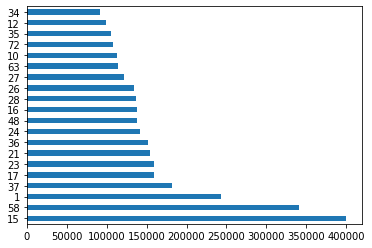

In [18]:
provinces_by_accident[:20].plot(kind='barh')

In [19]:
provinces_by_accident = df.PlaceOfOccurrence.value_counts()
high_accident_provinces = provinces_by_accident[provinces_by_accident >= 100000]
low_accident_provinces = provinces_by_accident[provinces_by_accident < 100000]

In [21]:
import seaborn as sns
sns.set_style("darkgrid")

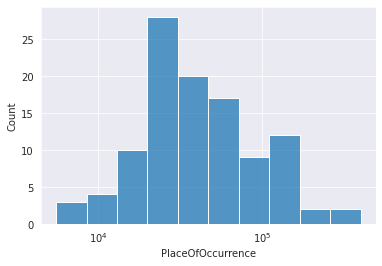

In [22]:
sns.histplot(provinces_by_accident, log_scale=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


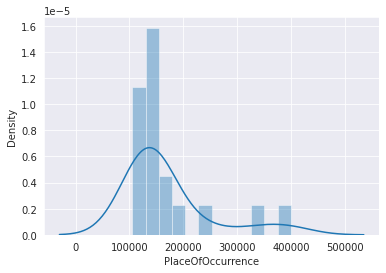

In [23]:
sns.distplot(high_accident_provinces)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


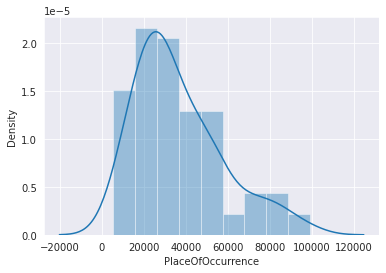

In [24]:
sns.distplot(low_accident_provinces)

Yearwise accidents

In [25]:
df['year'] = pd.DatetimeIndex(df['DateOfEvent']).year

In [26]:
df['year']

0          2018
1          2019
2          2020
3          2020
4          2017
           ... 
6299155    2018
6299156    2016
6299157    2020
6299158    2020
6299159    2017
Name: year, Length: 6299160, dtype: int64

In [27]:
yyyy = df['year'].unique()
len(yyyy)

5

In [28]:
years_by_accident = df['year'].value_counts()
years_by_accident

2017    1293866
2018    1290750
2019    1289986
2016    1282162
2020    1142396
Name: year, dtype: int64

Yearwise change in accidents

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


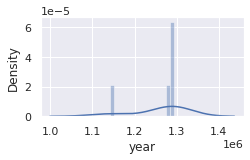

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = years_by_accident

subplot(2,2,1)
ax = sns.distplot(x)

Monthwise change in accidents :

In [31]:
df['month'] = pd.DatetimeIndex(df['DateOfEvent']).month

In [32]:
df['month']

0           6
1          12
2           1
3          12
4          10
           ..
6299155    10
6299156    10
6299157    11
6299158     4
6299159     6
Name: month, Length: 6299160, dtype: int64

In [33]:
monthwise_accident = df['month'].value_counts()

Conclusion : Accidents are maximum in the month of October

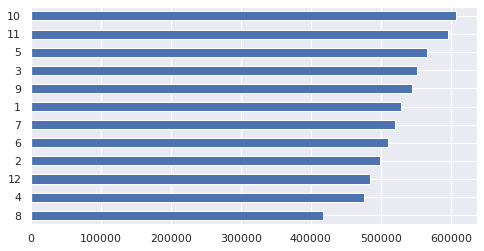

In [41]:
monthwise_accident.sort_values( ascending = True ).plot(kind='barh')

Which age group facing more accidents/events ?

In [49]:
Agewise = df.Age.value_counts()
Agewise

 51    166600
 52    166124
 50    165268
 53    164820
 49    163630
        ...  
-1        170
 88       136
 89        92
 0         32
 90         2
Name: Age, Length: 92, dtype: int64

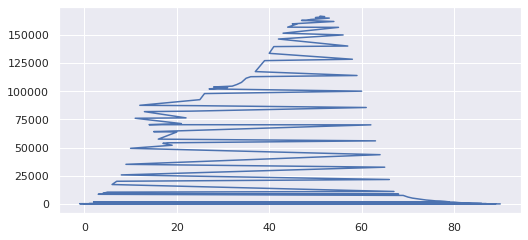

In [58]:
Agewise.plot.line()

It can be concluded that Age group (40-60 yrs) are more prone to accidents

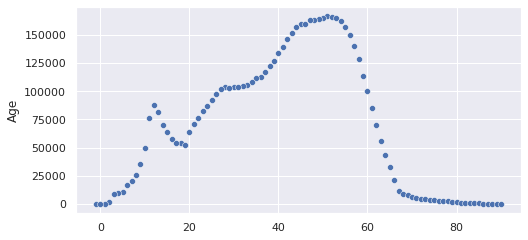

In [62]:
sns.scatterplot(x = Agewise.index , y = Agewise)

Agewise analysis for female & male workers

In [66]:
female_accidents = df[df['Gender'] == 'F'].Age.value_counts()
female_accidents

53    69990
54    69742
52    69246
51    68324
55    67856
      ...  
86       48
87       30
89       14
88       14
0        12
Name: Age, Length: 91, dtype: int64

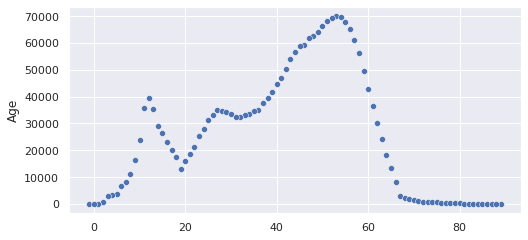

In [65]:
sns.scatterplot(x = female_accidents.index , y = female_accidents)

In [67]:
male_accidents = df[df['Gender'] == 'M'].Age.value_counts()
male_accidents

 45    101040
 47    100948
 44    100248
 48    100240
 46    100228
        ...  
-1        122
 88       122
 89        78
 0         20
 90         2
Name: Age, Length: 92, dtype: int64

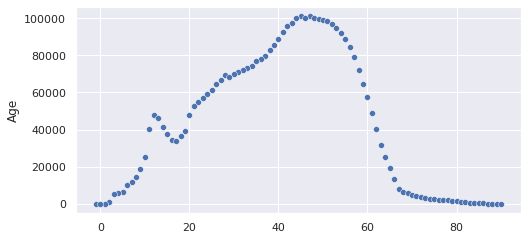

In [68]:
sns.scatterplot(x = male_accidents.index , y = male_accidents)

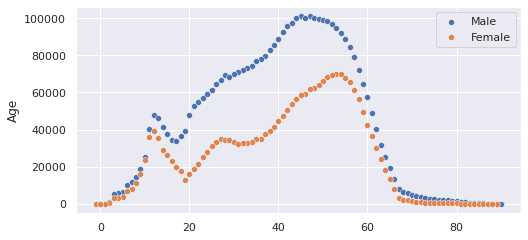

In [78]:
sns.scatterplot(x = male_accidents.index , y = male_accidents , label='Male')
sns.scatterplot(x = female_accidents.index , y = female_accidents , label='Female' )


**Summary & Conclusions**



*   Top 3 province with high no. of accidents : ['ISTAT Code' : 'Province' , '15':'Milan','58':'Rome','1':'Turin']
*   The data is present from year 2016 to 2020

*   Not much variation in number of accidents seen over the past 4 years.

*   Maximum accidents took place after the 10th month i.e. after October.

*   It can be concluded that Age group (40-60 yrs) are more prone to accidents  for both male & female gender







